
# Used Car Price Exploration

There are id and 12 characteristics of cars and the price.

1. Id - Car's id
2. Name - The brand and model of the car.
3. Location - The location in which the car is being sold or is available for purchase.
4. Year - The year or edition of the model.
5. Kilometers_Driven - The total kilometers are driven in the car by the previous owner(s) in KM.
6. Fuel_Type - The type of fuel used by the car. (Petrol, Diesel, Electric, CNG, LPG)
7. Transmission - The type of transmission used by the car. (Automatic / Manual)
8. Owner_Type - First, Second, Third, or Fourth & Above
9. Mileage - The standard mileage offered by the car company in kmpl or km/kg
10. Engine - The displacement volume of the engine in CC.
11. Power - The maximum power of the engine in bhp.
12. Seats - The number of seats in the car.
13. New_Price - The price of a new car of the same model.
14. Price - The price of the car (target).

### Loading the dataset

In [1]:
import pandas as pd
import numpy as np

In [2]:
cars_df = pd.read_csv( "usercarlastest.csv" )

In [3]:
type(cars_df)

pandas.core.frame.DataFrame

### Showing few records

In [4]:
cars_df.head(5)

,index,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
1,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
2,6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,3.50
3,9,Tata Indica Vista Quadrajet LS,Chennai,2012,65932,Diesel,Manual,Second,22.3 kmpl,1248 CC,74 bhp,5.0,NaN,1.95
4,12,Maruti Swift VDI BSIV,Jaipur,2015,64424,Diesel,Manual,First,25.2 kmpl,1248 CC,74 bhp,5.0,NaN,5.60


### Getting metadata

In [5]:
## Dimension of the dataset
cars_df.shape

(3092, 14)

In [6]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3092 entries, 0 to 3091
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              3092 non-null   int64  
 1   Name               3092 non-null   object 
 2   Location           3092 non-null   object 
 3   Year               3092 non-null   int64  
 4   Kilometers_Driven  3092 non-null   int64  
 5   Fuel_Type          3092 non-null   object 
 6   Transmission       3092 non-null   object 
 7   Owner_Type         3092 non-null   object 
 8   Mileage            3092 non-null   object 
 9   Engine             3092 non-null   object 
 10  Power              3092 non-null   object 
 11  Seats              3091 non-null   float64
 12  New_Price          411 non-null    object 
 13  Price              3092 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 338.3+ KB


### Histogram for plotting Continuous Variables (Price)

In [11]:
!pip3 install matplotlib
!pip3 install seaborn
import matplotlib.pyplot as plt
import seaborn as sn

sn.set_style("whitegrid")
sn.set_context("paper")
sn.color_palette("Set2");

You should consider upgrading via the '/usr/local/opt/python@3.9/bin/python3.9 -m pip install --upgrade pip' command.
     |████████████████████████████████| 292 kB 525 kB/s eta 0:00:01
     |████████████████████████████████| 32.8 MB 1.1 MB/s eta 0:00:01
You should consider upgrading via the '/usr/local/opt/python@3.9/bin/python3.9 -m pip install --upgrade pip' command.


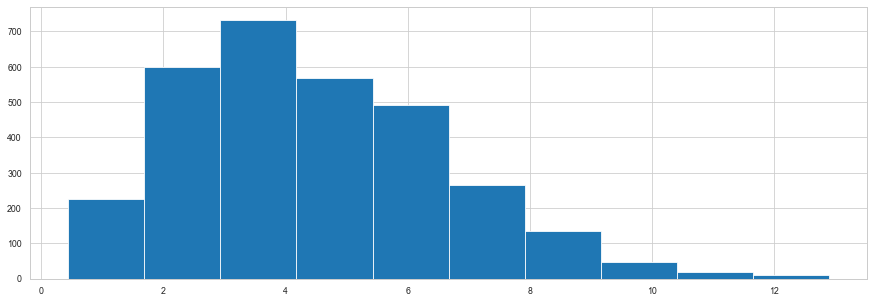

In [12]:
plt.figure(figsize=(15,5))
plt.hist(cars_df['Price']);

In [13]:
list(range(1,10, 2))

[1, 3, 5, 7, 9]

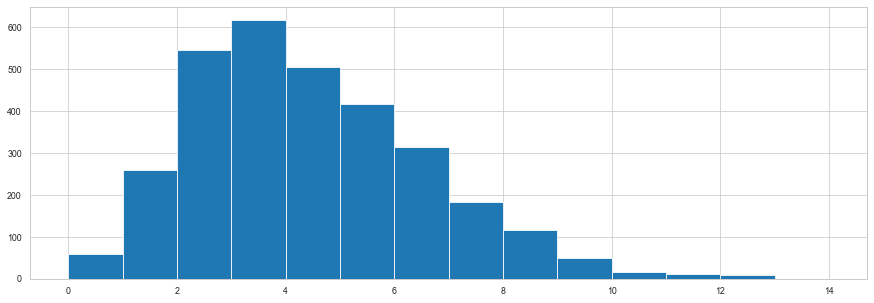

In [32]:
plt.figure(figsize=(15,5))
hist_data = plt.hist(cars_df['Price'], bins=list(range(0, 15, 1)));

### Finding Outliers

Reference: https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51
<img src="https://miro.medium.com/max/1400/1*2c21SkzJMf3frPXPAR_gZA.png" alt="Normal Distribution" width="600"/>

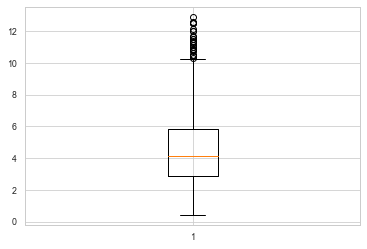

In [33]:
plt.boxplot(cars_df['Price']);

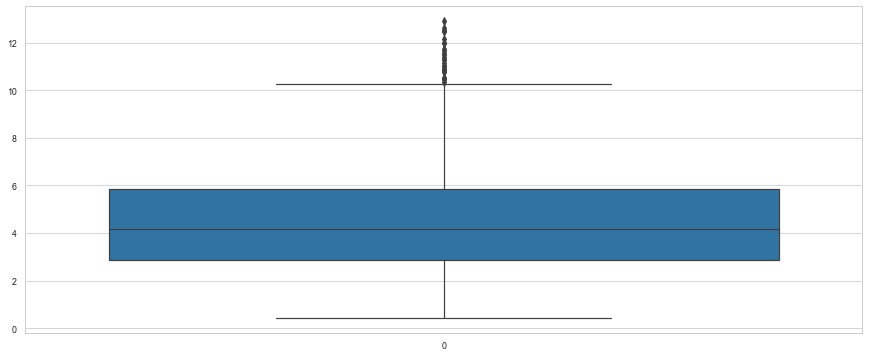

In [17]:
plt.figure(figsize=(15,6))
boxp = sn.boxplot(data=cars_df['Price']);

In [18]:
cars_df['Price'].median()

4.15

In [19]:
from scipy import stats

In [20]:
iqr = stats.iqr(cars_df['Price'])
iqr

2.9824999999999995

In [21]:
cars_df['Price'].describe()

count    3092.000000
mean        4.435783
std         2.116982
min         0.440000
25%         2.850000
50%         4.150000
75%         5.832500
max        12.900000
Name: Price, dtype: float64

In [34]:
min_price = cars_df['Price'].describe()['25%'] - 1.5 * iqr
max_price = cars_df['Price'].describe()['75%'] + 1.5 * iqr

In [35]:
min_price, max_price

(-1.623749999999999, 10.306249999999999)

In [24]:
cars_df[cars_df.Price < 10.30]['Price'].shape

(3064,)

/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


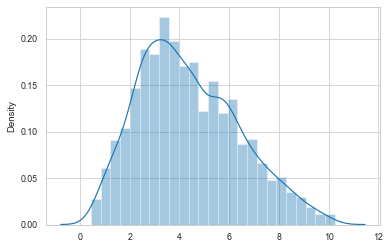

In [31]:
sn.distplot(x=cars_df[cars_df.Price < 10.30]['Price']);

### Creating new factors: Age of car

This is not the actual age of the car.

We are substracting the edition of the car from the current year.

In [36]:
cars_df['age'] = 2019 - cars_df['Year']

### Changing the Unit of KM Driven

In [37]:
cars_df['KM_Driven'] = cars_df['Kilometers_Driven'].map(lambda x: int(x/1000))

### Extracting Car Makes names from the name string
We are assuming the first token to be the make and the second token to be the model.

In [38]:
cars_df['make'] = cars_df['Name'].map( lambda x: x.lower().split()[0] )

In [39]:
cars_df.make.value_counts()

maruti        1082
hyundai        739
honda          316
ford           217
volkswagen     151
tata           151
chevrolet       88
renault         84
toyota          78
nissan          67
mahindra        61
skoda           21
fiat            21
datsun          13
mitsubishi       2
ambassador       1
Name: make, dtype: int64

In [40]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3092 entries, 0 to 3091
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              3092 non-null   int64  
 1   Name               3092 non-null   object 
 2   Location           3092 non-null   object 
 3   Year               3092 non-null   int64  
 4   Kilometers_Driven  3092 non-null   int64  
 5   Fuel_Type          3092 non-null   object 
 6   Transmission       3092 non-null   object 
 7   Owner_Type         3092 non-null   object 
 8   Mileage            3092 non-null   object 
 9   Engine             3092 non-null   object 
 10  Power              3092 non-null   object 
 11  Seats              3091 non-null   float64
 12  New_Price          411 non-null    object 
 13  Price              3092 non-null   float64
 14  age                3092 non-null   int64  
 15  KM_Driven          3092 non-null   int64  
 16  make               3092 

### Converting datatypes of columns

Engine capacity, power and mileage are not numerical values. We need to convert them to numerical values for analysis.

In [41]:
cars_df[0:2]

,index,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,age,KM_Driven,make
0,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.5,8,46,honda
1,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.0,7,87,maruti


In [42]:
import math

In [43]:
def get_float_val(x):
    if x is None:
        return None   
    
    val = str(x).split()[0]
    
    if val.replace(".","",1).isdigit():
        return float(val)        
    else:
        return None

In [44]:
cars_df['mileage_new'] = cars_df.Mileage.map(lambda x: get_float_val(x))

In [45]:
cars_df.mileage_new

0       18.20
1       20.77
2       23.08
3       22.30
4       25.20
        ...  
3087    25.80
3088    28.40
3089    24.40
3090    18.90
3091    25.44
Name: mileage_new, Length: 3092, dtype: float64

In [46]:
cars_df['engine_new'] = cars_df.Engine.map(lambda x: get_float_val(x))
cars_df['power_new'] = cars_df.Power.map(lambda x: get_float_val(x))

### How engine power and mileage is effecting price of the used cars?

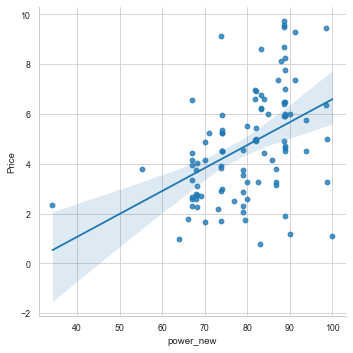

In [47]:
sn.lmplot(data = cars_df.sample(100),
          x = 'power_new',
          y = 'Price');

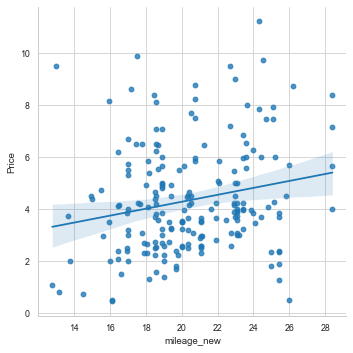

In [48]:
sn.lmplot(data = cars_df.sample(200),
          x = 'mileage_new',
          y = 'Price');

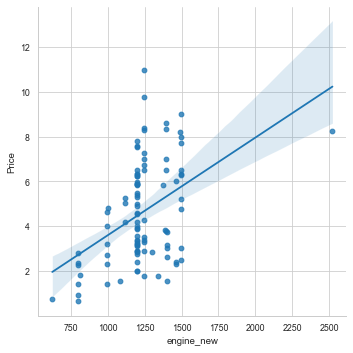

In [49]:
sn.lmplot(data = cars_df.sample(100),
          x = 'engine_new',
          y = 'Price');

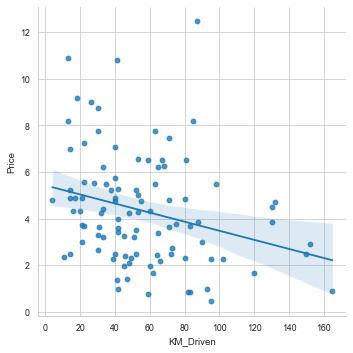

In [50]:
sn.lmplot(data = cars_df.sample(100),
          x = 'KM_Driven',
          y = 'Price');

In [51]:
cars_df[cars_df.engine_new > 2400]

,index,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,age,KM_Driven,make,mileage_new,engine_new,power_new
147,315,Tata Sumo Delux,Hyderabad,2000,158000,Diesel,Manual,Second,14.07 kmpl,2956 CC,83.1 bhp,7.0,NaN,1.50,19,158,tata,14.07,2956.0,83.1
209,442,Mahindra Bolero ZLX,Coimbatore,2016,82756,Diesel,Manual,First,15.96 kmpl,2523 CC,62.1 bhp,7.0,11.28 Lakh,7.70,3,82,mahindra,15.96,2523.0,62.1
223,469,Toyota Innova 2.5 VX (Diesel) 7 Seater,Hyderabad,2012,162663,Diesel,Manual,First,12.99 kmpl,2494 CC,100 bhp,7.0,NaN,10.50,7,162,toyota,12.99,2494.0,100.0
259,546,Toyota Innova 2.5 VX (Diesel) 7 Seater,Mumbai,2012,55000,Diesel,Manual,First,12.99 kmpl,2494 CC,100 bhp,7.0,NaN,9.51,7,55,toyota,12.99,2494.0,100.0
271,573,Mahindra Bolero ZLX,Jaipur,2012,105000,Diesel,Manual,Second,15.96 kmpl,2523 CC,62.1 bhp,7.0,11.15 Lakh,6.00,7,105,mahindra,15.96,2523.0,62.1
275,579,Mahindra Bolero VLX CRDe,Coimbatore,2012,60271,Diesel,Manual,First,13.6 kmpl,2523 CC,63 bhp,7.0,NaN,6.12,7,60,mahindra,13.60,2523.0,63.0
288,613,Mahindra Bolero ZLX BSIII,Kolkata,2000,124000,Diesel,Manual,First,13.6 kmpl,2523 CC,63 bhp,7.0,NaN,1.95,19,124,mahindra,13.60,2523.0,63.0
295,629,Mahindra Bolero DI BSII,Chennai,2006,82453,Diesel,Manual,First,13.6 kmpl,2523 CC,63 bhp,8.0,NaN,2.90,13,82,mahindra,13.60,2523.0,63.0
388,814,Toyota Qualis FS B2,Pune,2004,77757,Diesel,Manual,Second,13.1 kmpl,2446 CC,75 bhp,10.0,NaN,3.50,15,77,toyota,13.10,2446.0,75.0
413,862,Mahindra Bolero VLX BS IV,Chennai,2011,99000,Diesel,Manual,Second,13.6 kmpl,2523 CC,63 bhp,7.0,NaN,4.50,8,99,mahindra,13.60,2523.0,63.0


In [52]:
cars_df.mileage_new

0       18.20
1       20.77
2       23.08
3       22.30
4       25.20
        ...  
3087    25.80
3088    28.40
3089    24.40
3090    18.90
3091    25.44
Name: mileage_new, Length: 3092, dtype: float64

### Finding corrleation between multiple variables (numerical)

In [53]:
corr_mat = cars_df[['Price', 'mileage_new', 'engine_new', 'power_new', 'KM_Driven']].corr()

In [54]:
corr_mat

,Price,mileage_new,engine_new,power_new,KM_Driven
Price,1.000000,0.303392,0.329355,0.519470,-0.280577
mileage_new,0.303392,1.000000,-0.156949,-0.022680,-0.079414
engine_new,0.329355,-0.156949,1.000000,0.607726,0.282310
power_new,0.519470,-0.022680,0.607726,1.000000,0.010005
KM_Driven,-0.280577,-0.079414,0.282310,0.010005,1.000000


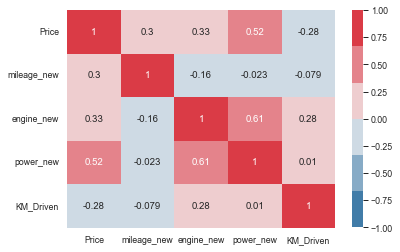

In [55]:
sn.heatmap(corr_mat,
           annot=True,
           vmin = -1.0,
           vmax = 1.0,
           cmap = sn.diverging_palette(240, 10));

In [56]:
cars_df.shape

(3092, 20)

### Saving the dataset (with new features) 

In [57]:
cars_df.to_csv( "new_used_car_v1.csv", index = False)